In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold

In [62]:
df = pd.read_csv('data/transport_data.csv')
df.head()

,log,lat,request_ts,trans_ts,label
0,30.295780,59.932167,1511956827,1511956594,0
1,30.219528,59.954617,1511956827,1511956746,-
2,30.409101,59.931679,1511956827,1511956747,-
3,30.293602,59.938892,1511956827,1511956759,-
4,30.360102,59.931103,1511956827,1511956767,-


In [63]:
min_t = df['trans_ts'].min()

df['trans_ts'] = df['trans_ts'] - min_t
df['request_ts'] = df['request_ts'] - min_t

df['local_trans_ts'] = df['trans_ts'] % 86400       

df['log_2'] = df['log']**2
df['lat_2'] = df['lat']**2
df['lat_log'] = df['lat'] * df['log']
df['lat_over_log'] = df['lat'] / df['log']
df['log_over_lat'] = df['log'] / df['lat']

df['log_3'] = df['log']**3
df['lat_3'] = df['lat']**3
df['log_4'] = df['log']**4
df['lat_4'] = df['lat']**4

df['trans_over_lat'] = df['trans_ts'] / df['lat']
df['trans_over_log'] = df['trans_ts'] / df['log']
df['request_over_lat'] = df['request_ts'] / df['lat']
df['request_over_log'] = df['request_ts'] / df['log']
df['localtime_over_lat'] = df['local_trans_ts'] / df['lat']
df['localtime_over_log'] = df['local_trans_ts'] / df['log']

df['lat_over_request'] = df['lat'] / (df['request_ts'] + 1)
df['log_over_request'] = df['log'] / (df['request_ts'] + 1)
df['lat_over_localtime'] = df['lat'] / (df['local_trans_ts'] + 1)
df['log_over_localtime'] = df['log'] / (df['local_trans_ts'] + 1)

df['trans_ts_2'] = df['trans_ts']**2
df['request_ts_2'] = df['request_ts']**2
df['local_trans_ts_2'] = df['local_trans_ts']**2
df['local_trans_ts_3'] = df['local_trans_ts']**3

df['trans_lat'] = df['trans_ts']*df['lat']
df['trans_log'] = df['trans_ts']*df['log']
df['request_lat'] = df['request_ts']*df['lat']
df['request_log'] = df['request_ts']*df['log']
df['local_trans_lat'] = df['local_trans_ts']*df['lat']
df['local_trans_log'] = df['local_trans_ts']*df['log']

df['lat_log_trans'] = df['trans_ts'] * df['lat'] * df['log']
df['lat_log_request'] = df['request_ts'] * df['lat'] * df['log']
df['lat_log_time'] = df['local_trans_ts'] * df['lat'] * df['log']

df['time_over_lat_log'] = df['local_trans_ts'] * df['lat'] / df['log']
df['time_over_log_lat'] = df['local_trans_ts'] * df['log'] / df['lat']
df['time_over_lat_over_log'] = df['local_trans_ts'] / df['lat'] / df['log']

df['lat_log_over_request'] = df['lat'] * df['log'] / (df['request_ts'] + 1)
df['lat_log_over_time'] = df['lat'] * df['log'] / (df['local_trans_ts'] + 1)

df['lat_over_log_over_request'] = df['lat'] / df['log'] / (df['request_ts'] + 1)
df['lat_over_log_over_time'] = df['lat'] / df['log'] / (df['local_trans_ts'] + 1)

df['log_over_lat_over_request'] = df['log'] / df['lat'] / (df['request_ts'] + 1)
df['log_over_lat_over_time'] = df['log'] / df['lat'] / (df['local_trans_ts'] + 1)

df.tail()

,log,lat,request_ts,trans_ts,label,local_trans_ts,log_2,lat_2,lat_log,lat_over_log,...,lat_log_time,time_over_lat_log,time_over_log_lat,time_over_lat_over_log,lat_log_over_request,lat_log_over_time,lat_over_log_over_request,lat_over_log_over_time,log_over_lat_over_request,log_over_lat_over_time
58660,30.382755,59.942825,345771,345766,?,166,923.111818,3593.142307,1821.228192,1.972923,...,302323.879935,327.505156,84.139133,0.091147,0.005267,10.905558,0.000006,0.011814,0.000001,0.003035
58661,30.306246,59.943558,345801,345782,-,182,918.468535,3593.230114,1816.664195,1.977928,...,330632.883527,359.982809,92.015505,0.100184,0.005253,9.927127,0.000006,0.010808,0.000001,0.002763
58662,30.306704,59.933582,345801,345783,0,183,918.496281,3592.034288,1816.389313,1.977568,...,332399.244221,361.895035,92.537882,0.100749,0.005253,9.871681,0.000006,0.010748,0.000001,0.002748
58663,30.373922,59.937569,345801,345787,-,187,922.575159,3592.512137,1820.539056,1.973323,...,340440.803537,369.011457,94.763995,0.102717,0.005265,9.683718,0.000006,0.010496,0.000001,0.002696
58664,30.336237,59.934052,345801,345795,-,195,920.287273,3592.090531,1818.173588,1.975659,...,354543.849722,385.253453,98.701257,0.107250,0.005258,9.276396,0.000006,0.010080,0.000001,0.002582


In [64]:
df_clean = df[df['label'] != '-']

df_train = df_clean[df_clean['label'] != '?']
df_unlabeled = df[df['label'] == '-']
df_test = df[df['label'] == '?']

df_train['label'] = pd.to_numeric(df_train['label'])
df_train.head()

/media/andre6o6/aux/anaconda3/envs/nn/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,log,lat,request_ts,trans_ts,label,local_trans_ts,log_2,lat_2,lat_log,lat_over_log,...,lat_log_time,time_over_lat_log,time_over_log_lat,time_over_lat_over_log,lat_log_over_request,lat_log_over_time,lat_over_log_over_request,lat_over_log_over_time,log_over_lat_over_request,log_over_lat_over_time
0,30.295780,59.932167,233,0,0,0,917.834297,3591.864648,1815.691759,1.978235,...,0.000000,0.000000,0.000000,0.000000,7.759366,1815.691759,0.008454,1.978235,0.002160,0.505501
8,30.385973,59.944260,233,188,0,188,923.307354,3593.314264,1821.464654,1.972761,...,342435.354884,370.879051,95.297914,0.103214,7.784037,9.637379,0.008431,0.010438,0.002166,0.002682
13,30.374880,59.938213,233,208,1,208,922.633325,3592.589419,1820.616028,1.973282,...,378688.133846,410.442723,105.408130,0.114247,7.780410,8.711081,0.008433,0.009442,0.002166,0.002425
17,30.347544,59.932667,233,217,0,217,920.973410,3591.924547,1818.809225,1.974877,...,394681.601848,428.548314,109.880260,0.119309,7.772689,8.343162,0.008440,0.009059,0.002164,0.002323
23,30.312321,59.937405,233,226,2,226,918.836787,3592.492474,1816.841832,1.977328,...,410606.253964,446.876159,114.295648,0.124392,7.764281,8.003709,0.008450,0.008711,0.002161,0.002228


In [6]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

In [494]:
def train_clf(X_train_fold, y_train_fold, n_folds=5, clfs=['gb','et','mlp','rf','ada','qda'], reuse=False):
    
    n_clfs = len(clfs)
    
    cv = StratifiedKFold(n_splits=n_folds, shuffle=True)
    cv.get_n_splits(X_train_fold, y_train_fold)
    
    gbs = []
    ets = []
    mlps = []
    rfs = []
    adas = []
    qdas = []

    accuracy = []
    f1 = []
    
    i = 0
    for train_index, test_index in cv.split(X_train_fold, y_train_fold):
        X_train, X_test = X_train_fold[train_index], X_train_fold[test_index]
        y_train, y_test = y_train_fold[train_index], y_train_fold[test_index]

        if 'gb' in clfs:
            gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, subsample=0.8)
            gb.fit(X_train, y_train)
            gbs.append(gb)
            
            y_pred = gb.predict(X_test)
            accuracy.append(get_metrics(y_test, y_pred)[0])
            f1.append(get_metrics(y_test, y_pred)[-1])
            
        if 'et' in clfs:
            et = ExtraTreesClassifier(n_estimators=100, max_features=None)
            et.fit(X_train, y_train)
            ets.append(et)
            
            y_pred = et.predict(X_test)
            accuracy.append(get_metrics(y_test, y_pred)[0])
            f1.append(get_metrics(y_test, y_pred)[-1])
            
        if 'mlp' in clfs:
            mlp = MLPClassifier(hidden_layer_sizes=(64, 32, 32, 16), max_iter=1000)
            mlp.fit(X_train, y_train)
            mlps.append(mlp)
            
            y_pred = mlp.predict(X_test)
            accuracy.append(get_metrics(y_test, y_pred)[0])
            f1.append(get_metrics(y_test, y_pred)[-1])
            
        if 'rf' in clfs:
            rfc = RandomForestClassifier(n_estimators=200, max_features=None, criterion='entropy')
            rfc.fit(X_train, y_train)
            rfs.append(rfc)
            
            y_pred = rfc.predict(X_test)
            accuracy.append(get_metrics(y_test, y_pred)[0])
            f1.append(get_metrics(y_test, y_pred)[-1])
            
        if 'ada' in clfs:
            ada = AdaBoostClassifier(LogisticRegression(C=50, solver='lbfgs', multi_class='auto', max_iter=10000),
                                     n_estimators=10, learning_rate=0.1)
            ada.fit(X_train, y_train)
            adas.append(ada)
            
            y_pred = ada.predict(X_test)
            accuracy.append(get_metrics(y_test, y_pred)[0])
            f1.append(get_metrics(y_test, y_pred)[-1])  
            
        if 'qda' in clfs:
            qda = QuadraticDiscriminantAnalysis()
            qda.fit(X_train[:, :5], y_train)
            qdas.append(qda)
            
            y_pred = qda.predict(X_test[:, :5])
            accuracy.append(get_metrics(y_test, y_pred)[0])
            f1.append(get_metrics(y_test, y_pred)[-1]) 

        i+=1
        print("*")
        
    for i,clf in enumerate(clfs):
        print("%s - acc = %.3f f1 = %.3f" % (clf, sum(accuracy[i::n_clfs])/n_folds, sum(f1[i::n_clfs])/n_folds))
        
    return gbs, ets, mlps, rfs, adas, qdas, accuracy, f1

def test(X_dev, y_dev, n_folds=5, clfs=['gb','et','mlp','rf','ada','qda']):
    n_clfs=len(clfs)
    
    n_classes = 3
    y_prob = np.zeros((len(y_dev), n_classes))
    
    k = 1/n_clfs/n_folds
    
    for i in range(n_folds):
        if 'gb' in clfs:
            y_prob += k * gbs[i].predict_proba(X_dev)
        if 'et' in clfs:
            y_prob += k * ets[i].predict_proba(X_dev)
        if 'mlp' in clfs:
            y_prob += k * mlps[i].predict_proba(X_dev)
        if 'rf' in clfs:
            y_prob += k * rfs[i].predict_proba(X_dev)
        if 'ada' in clfs:
            y_prob += k * adas[i].predict_proba(X_dev)
        if 'qda' in clfs:
            y_prob += k * qdas[i].predict_proba(X_dev[:, :5])

    y_pred = np.argmax(y_prob, axis=1)
    
    y_probs = np.max(y_prob, axis=1)
    
    return y_pred, y_probs

def get_dist(y_dev, y_pred, y_probs):
    y_good = y_probs[y_dev == y_pred]
    y_bad = y_probs[y_dev != y_pred]
    
    sns.distplot(y_good)
    sns.distplot(y_bad)

In [8]:
def pseudolabel(df_unlabeled, n_folds=5, threshold_strong = 0.95, threshold_weak = 0.7, 
                clfs=['gb','et','mlp','rf', 'ada','qda']):
    
    if 'proba' in df_unlabeled.columns:
        df_unlabeled.drop(columns='proba', inplace=True)
    
    X_unlabeled = df_unlabeled.drop(columns="label").values
    X_unlabeled = scaler.transform(X_unlabeled)
    
    n_clfs=len(clfs)
    k = 1/n_clfs/n_folds
    
    n_classes = 3
    y_prob = np.zeros((len(X_unlabeled), n_classes))
    for i in range(n_folds):
        if 'gb' in clfs:
            y_prob += k * gbs[i].predict_proba(X_unlabeled)
        if 'et' in clfs:
            y_prob += k * ets[i].predict_proba(X_unlabeled)
        if 'mlp' in clfs:
            y_prob += k * mlps[i].predict_proba(X_unlabeled)
        if 'rf' in clfs:
            y_prob += k * rfs[i].predict_proba(X_unlabeled)
        if 'ada' in clfs:
            y_prob += k * adas[i].predict_proba(X_unlabeled)
        if 'qda' in clfs:
            y_prob += k * qdas[i].predict_proba(X_unlabeled[:, :5])
    y_pred = np.argmax(y_prob, axis=1)
    
    df_unlabeled['label'] = y_pred
    df_unlabeled['proba'] = y_prob.max(axis=1)
    
    df_new = df_unlabeled[df_unlabeled['proba'] > threshold_strong]    
    df_new.drop(columns='proba', inplace=True)
    df_unlabeled.drop(df_new.index, inplace=True)
    
    df_unsertain = df_unlabeled[df_unlabeled['proba'] > threshold_weak]
    df_unsertain.drop(columns='proba', inplace=True)
    
    return df_unlabeled, df_new, df_unsertain

In [93]:
y = df_train["label"].values
X = df_train.drop(columns="label").values

scaler = MinMaxScaler(feature_range=(-1,1))
X = scaler.fit_transform(X)

X_train_fold, X_dev, y_train_fold, y_dev = train_test_split(X, y, test_size=0.2, shuffle=True)

print(X_train_fold.shape, X_dev.shape)

(8000, 46) (2000, 46)


# Main cicle

In [533]:
# Train clfs

#gbs, ets, mlps, rfs, adas, qdas, acc, f1 = train_clf(X_train_fold, y_train_fold)
gbs, ets, mlps, rfs, adas, qdas, acc, f1 = train_clf(X_train, y_train, clfs = ['gb','et','mlp'])

*
*
*
*
*
gb - acc = 0.924 f1 = 0.923
et - acc = 0.927 f1 = 0.927
mlp - acc = 0.890 f1 = 0.889


accuracy = 0.618, precision = 0.626, recall = 0.618, f1 = 0.580


/media/andre6o6/aux/anaconda3/envs/nn/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


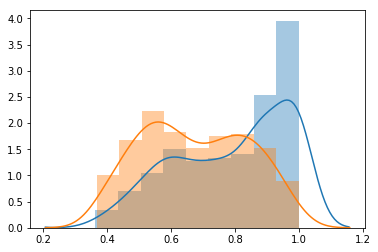

In [534]:
# Test to see which clfs to use

clfs = ['gb','et','mlp']

y_pred, y_probs = test(X_dev[1000:], y_dev[1000:], clfs=clfs)
accuracy, precision, recall, f1 = get_metrics(y_dev[1000:], y_pred)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

get_dist(y_dev[1000:], y_pred, y_probs)

In [ ]:
y_pred, y_probs = test_2(X_dev, y_dev, clfs=clfs)
accuracy, precision, recall, f1 = get_metrics(y_dev, y_pred)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

get_dist(y_dev, y_pred, y_probs)

In [538]:
# Get probs and pseudolabel

df_unlabeled, df_new, df_unsertain = pseudolabel(df_unlabeled, threshold_strong = 0.7, threshold_weak = 0.0, 
                                                 clfs=clfs)
print(len(df_unlabeled), len(df_new), len(df_unsertain))

In [530]:
# Re-make trainset

y_new = df_new["label"].values
X_new = df_new.drop(columns="label").values
X_new = scaler.transform(X_new)

y_unsertain = df_unsertain["label"].values
X_unsertain = df_unsertain.drop(columns="label").values
X_unsertain = scaler.transform(X_unsertain)


X_train_fold = np.vstack((X_train_fold, X_new))
y_train_fold = np.concatenate((y_train_fold, y_new))

X_train =  np.vstack((X_train_fold, X_unsertain))
y_train = np.concatenate((y_train_fold, y_unsertain))

# Submission

In [535]:
def submit(filename='submission.txt', n_folds=5):
    df_submission = df[df['label'] == '?']
    X_test = df_submission.drop(columns="label").values
    X_test = scaler.fit_transform(X_test)
    
    k = 1/3/n_folds
    y_prob = np.zeros((len(X_test), 3))
    for i in range(n_folds):
        y_prob += k * gbs[i].predict_proba(X_test)
        y_prob += k * ets[i].predict_proba(X_test)
        y_prob += k * mlps[i].predict_proba(X_test)
        #y_prob += k * rfs[i].predict_proba(X_test)
        #y_prob += k * adas[i].predict_proba(X_test)
        #y_prob += k * qdas[i].predict_proba(X_test[:, :5])
    y_pred = np.argmax(y_prob, axis=1)

    y_pred = [str(x) for x in y_pred]

    import os
    with open(os.path.join('', filename), 'w') as f:
        f.write('\n'.join(y_pred))
        
submit()